# Homework 1
- 姓名： 赵懿
- 学号： 21921266

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## generate data
First we need a func to sample out dataset from curve $y=sin(2\pi x)$, here I set Gaussian noise with parameters mean=0, std varance=0.2.

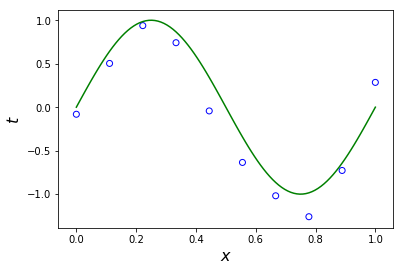

In [53]:
mySin = lambda x:np.sin(2*np.pi*x)

def sample(curve, num=10, start=0, end=1):
    x = np.linspace(start, end, num)
    t = curve(x)
    return x, t

def get_data(num=10, sigma=0.2):
    x, t = sample(mySin, num)
    t += np.random.normal(loc=0.0, scale=sigma, size=num)
    return np.array([x, t])

dataset = get_data()
plt.scatter(dataset[0], dataset[1], edgecolor='b', facecolor='none')

sin_x, sin_t = sample(mySin, num=100)
plt.plot(sin_x, sin_y, color='g')

plt.ylabel('$t$', fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('$x$', fontdict={'family':'Times New Roman', 'size':16})
plt.show()

## curve fitting
I use to Linear Regression (actually Ridge Regression) solve the polynomial curve fitting problem.

In [54]:
def polyData(data, degree):
    x = []
    for d in range(degree+1):
        x.append(data**d)
    x = np.array(x)
    return x.T

def lr_fitting(xs, ys, lamda=0):
    xTx = xs.T@xs
    unit =np.eye(xTx.shape[0])
    w = np.linalg.inv(xTx + lamda * unit)@(xs.T@ys)
    return w

def exp(degree, lamda):
    xs = polyData(dataset[0], degree)
    ys = dataset[1]
    w = lr_fitting(xs, ys, lamda)
    print('w:')
    print(w)
    show_x = np.linspace(0, 1, 100)
    show_y = polyData(show_x, degree)@w
    plt.scatter(dataset[0], dataset[1], edgecolor='b', facecolor='none')
    plt.plot(sin_x, sin_y, color='g', label='$sin(2\pi x)$')
    plt.plot(show_x, show_y, color='r', label='fitting curve')
    plt.ylabel('$t$', fontdict={'family':'Times New Roman', 'size':16})
    plt.xlabel('$x$', fontdict={'family':'Times New Roman', 'size':16})
    plt.title('N: {}, degree: {}, $\lambda$: {}'.format(len(ys), degree, lamda))
    plt.legend()
    plt.show()

### Degree
Then let's see how the `degree` influences performence of polynomial model.

w:
[ 0.4751566 -1.2098776]


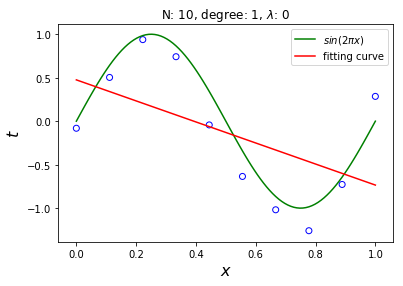

w:
[ -0.15203879  11.16599788 -34.94682829  24.24731005]


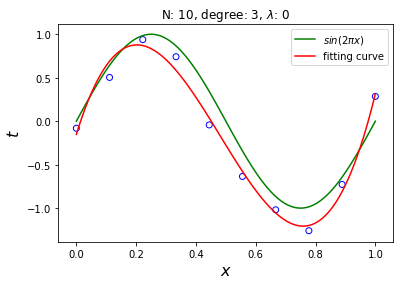

w:
[-1.01802459e-01  6.93775553e+00 -5.02416625e-01 -7.16109726e+01
  1.08599815e+02 -4.30451790e+01]


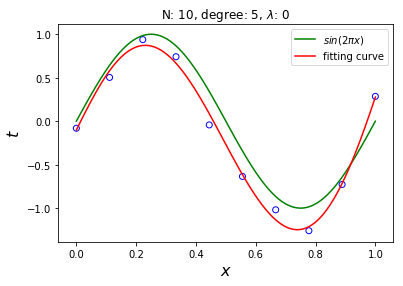

w:
[-8.14133340e-02  2.35283193e+01 -4.29801764e+02  3.92955232e+03
 -1.83501067e+04  4.76033831e+04 -7.20957363e+04  6.34743083e+04
 -3.00817253e+04  5.92696445e+03]


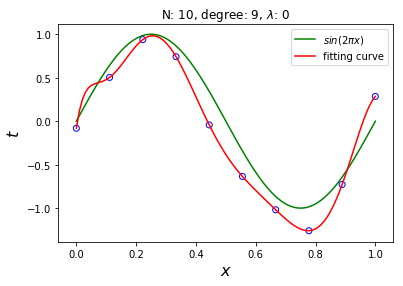

In [55]:
exp(1, 0)
exp(3, 0)
exp(5, 0)
exp(9, 0)

- apperantly, with degree 1, model is not powerful enough to fit the curve of sin
- with degree 3 or 5, model gets a quite good performance
- with degree 9, through fitting curve does pass all points, model is too complicated to fit the real curve of function sin. We can also see that some elements of $w$ are very big.

### Regulization
Then we apply regulization method with $\lambda=e-10, e-5, e-3, e-1, 1$:


w:
[-8.76095502e-02  2.14551389e+00  5.94909776e+01 -3.15650737e+02
  4.68083215e+02 -4.80286994e+01 -3.59877731e+02  5.25649593e+00
  3.76368462e+02 -1.87411667e+02]


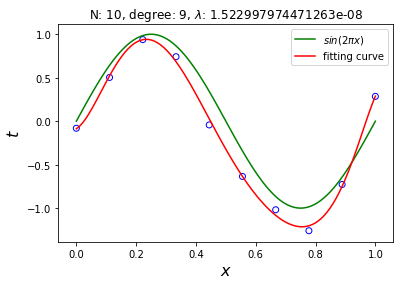

w:
[ -0.0975723    8.50376743 -19.01127651  -3.5825226    8.16578494
   8.32967979   3.59254726  -0.78449728  -2.73700361  -2.09631777]


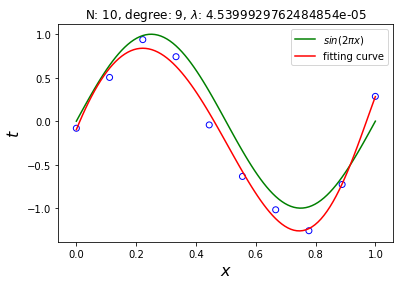

w:
[ 0.37913378 -0.69492606 -0.78975505 -0.49449058 -0.18921035  0.05735525
  0.24491132  0.38565794  0.49148549  0.57166188]


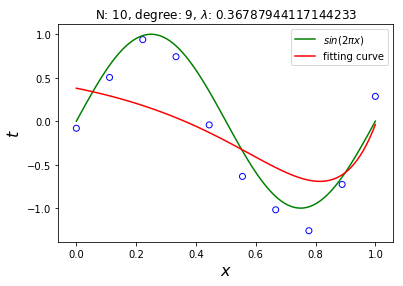

w:
[ 0.20066897 -0.47399926 -0.44793834 -0.27328842 -0.10828357  0.02267537
  0.12244275  0.19801206  0.25559456  0.29990943]


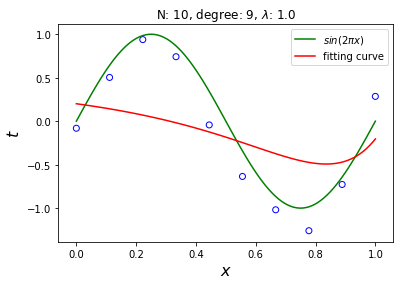

w:
[ 0.06276623 -0.2559007  -0.22609311 -0.14192496 -0.06570796 -0.00580219
  0.03982141  0.07450455  0.10107984  0.12166777]


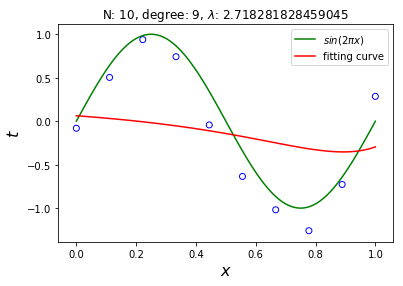

In [56]:
exp(9, np.exp(-18))
exp(9, np.exp(-10))
exp(9, np.exp(-1))
exp(9, np.exp(0))
exp(9, np.exp(1))

As we can see, the absolute value of $w$ is constrained by regulization item. But when $\lambda$ is too big, all the elements of $w$ are forced to decrese to near 0.

### Size of Dataset
We can also solve overfitting problem by increasing the size of dataset. Let increase the size to 15, 50, 100 respectively (with degree=9, $\lambda = 0$).

w:
[-1.89970307e-01  3.99766443e+01 -8.65528952e+02  8.66288503e+03
 -4.39556698e+04  1.25017263e+05 -2.09055466e+05  2.04206296e+05
 -1.07801944e+05  2.37523788e+04]


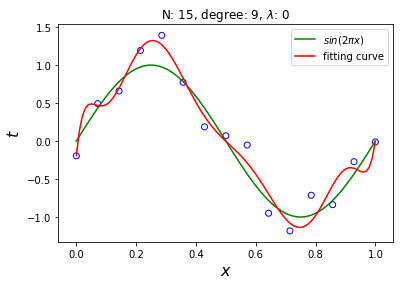

w:
[-8.92998349e-02  2.02227227e+01 -3.31595326e+02  2.96411074e+03
 -1.38162184e+04  3.62356156e+04 -5.62039724e+04  5.13108376e+04
 -2.55056015e+04  5.32692724e+03]


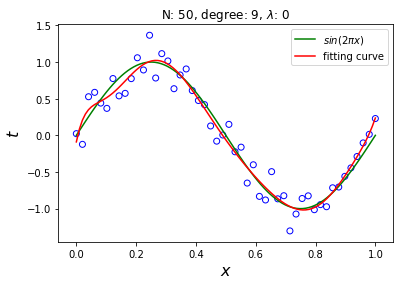

w:
[ 5.16407260e-03  9.83812817e+00 -1.29685686e+02  1.34262658e+03
 -6.98025590e+03  1.96578796e+04 -3.22983432e+04  3.10828342e+04
 -1.62366163e+04  3.55168515e+03]


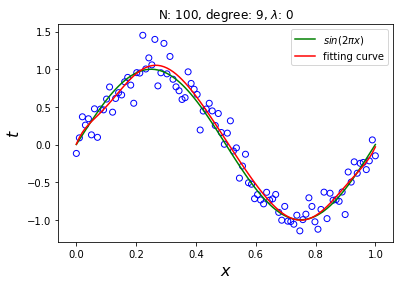

In [59]:
dataset = get_data(15)
exp(9, 0)
dataset = get_data(50)
exp(9, 0)
dataset = get_data(100)
exp(9, 0)

As the size of dataset increasing, the model fits the curve of sin better and better. But we should also notice that the abusolute values of $w$ do not decrease much in this process.